In [1]:
#ok, first, import libraries and then select stocks and bond tickers and put them in a list
#you also need to chose a start and end date

import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
from pypfopt import risk_models,expected_returns,EfficientFrontier
import pandas as pd


stocks = ['AAPL','TSLA','MCD','GOOGL','T','TGT','SBUX','IBM']
bonds = ['BND','AGG','LQD','MUB','IEF','SHY','IUSB','JPST']


start_date = '2023-11-01'
end_date = '2024-01-02'


df_stocks = yf.download(tickers=stocks,start=start_date,end=end_date)['Close']
df_bonds = yf.download(tickers=bonds,start=start_date,end=end_date)['Close']

[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  8 of 8 completed


In [2]:
# drop nas and use %change to make it so you have one dataframe for bond returns and one for stock returns
#returns on bonds and stocks

returns_stocks = df_stocks.pct_change().dropna()
returns_bonds = df_bonds.pct_change().dropna()
print('Returns on stocks:',returns_stocks)
print('Returns on bonds:',returns_bonds)


Returns on stocks:                 AAPL     GOOGL       IBM       MCD      SBUX         T  \
Date                                                                     
2023-11-02  0.020693  0.008225  0.011073  0.018628  0.094800  0.009628   
2023-11-03 -0.005181  0.012629  0.006054  0.003822  0.026397  0.009536   
2023-11-06  0.014605  0.008908  0.007235  0.003883  0.013444 -0.008186   
2023-11-07  0.014451  0.005528 -0.000940 -0.000892 -0.003364  0.005714   
2023-11-08  0.005885  0.006643 -0.005375 -0.004392  0.005980 -0.011995   
2023-11-09 -0.002625 -0.012136 -0.009525 -0.002168 -0.019847 -0.001278   
2023-11-10  0.021874  0.018044  0.016369  0.003297  0.020542  0.000640   
2023-11-13 -0.008584 -0.003771 -0.006174  0.005265 -0.007860 -0.003836   
2023-11-14  0.014286  0.011583  0.015598  0.008507  0.020191  0.003209   
2023-11-15  0.003041  0.007484  0.014427 -0.004052  0.004072  0.008317   
2023-11-16  0.009042  0.017159  0.003146  0.021192  0.011129  0.007614   
2023-11-17 -0.00010

In [3]:
#from the library pypfopt, whatever you used to import your assets from yfinance to make expected returns and 
# volatiltiy of each portfolio

# expected returns on stocks and expected returns on bonds

mu_stocks = expected_returns.mean_historical_return(df_stocks)
mu_bonds = expected_returns.mean_historical_return(df_bonds)

#Standard Deviation(risk) of bonds and stocks

S_stocks = risk_models.sample_cov(df_stocks)
S_bonds = risk_models.sample_cov(df_bonds)

# effcient frontier for stocks and bonds
ef_stocks = EfficientFrontier(mu_stocks, S_stocks)
ef_bonds = EfficientFrontier(mu_bonds, S_bonds)


In [4]:
# Calculate the weights for stocks and bonds from the ef_stocks and ef_bonds dataframe because those are your
# efficient frontiers and you need to use those to get the weights, the volatility and expected returns for both the bonds and
# stocks portfolios, you also need a risk-free rate. After that, you need to calulate the sharpe ratio


#risk-free rate currently based on the 10-year tresury bond yield from TIPS
risk_free_rate = 0.0178

# weights for stocks and bonds
weights_stocks = ef_stocks.max_sharpe()
weights_bonds = ef_bonds.max_sharpe()

cleaned_weights_stocks = ef_stocks.clean_weights()
cleaned_weights_bonds = ef_bonds.clean_weights()

print('Weights for stocks',cleaned_weights_stocks)
print('weights for bonds',cleaned_weights_bonds)


#portfolio performance of stocks and bonds, expected returns and risk

# stocks
portfolio_performace_stocks = ef_stocks.portfolio_performance()[0]
portfolio_volatility_stocks = ef_stocks.portfolio_performance()[1]

#Sharpe Ratio for stocks

sharpe_ratio_stocks = portfolio_performace_stocks - risk_free_rate / portfolio_volatility_stocks

print('the expected return of the optimal portfolio of the given stocks',portfolio_performace_stocks)
print('The Standard Deviation of the optimal portfolio(risk)',portfolio_volatility_stocks)
print('The Shapre Ratio of the stocks which are currenlty selected',sharpe_ratio_stocks)

Weights for stocks OrderedDict([('AAPL', 0.03832), ('GOOGL', 0.04082), ('IBM', 0.22927), ('MCD', 0.53265), ('SBUX', 0.0), ('T', 0.0), ('TGT', 0.10948), ('TSLA', 0.04946)])
weights for bonds OrderedDict([('AGG', 0.0), ('BND', 0.0), ('IEF', 0.0), ('IUSB', 0.0), ('JPST', 0.0), ('LQD', 0.0), ('MUB', 1.0), ('SHY', 0.0)])
the expected return of the optimal portfolio of the given stocks 1.527334187446343
The Standard Deviation of the optimal portfolio(risk) 0.10954014344377834
The Shapre Ratio of the stocks which are currenlty selected 1.3648366825098457


In [5]:
#same thing but for bonds
#bonds
portfolio_performace_bonds = ef_bonds.portfolio_performance()[0]
portfolio_volatility_bonds = ef_bonds.portfolio_performance()[1]

sharpe_ratio_bonds = portfolio_performace_bonds - risk_free_rate / portfolio_volatility_bonds

print('The expected return on the selected portfolio of bonds',portfolio_performace_bonds)
print('The current Standard Deviation (risk) of the selected bonds(currently)', portfolio_volatility_bonds)
print('The current Sharpe Ratio of the selected bonds',sharpe_ratio_bonds)

The expected return on the selected portfolio of bonds 0.5427789802997067
The current Standard Deviation (risk) of the selected bonds(currently) 0.04868162831018813
The current Sharpe Ratio of the selected bonds 0.17713796503656687


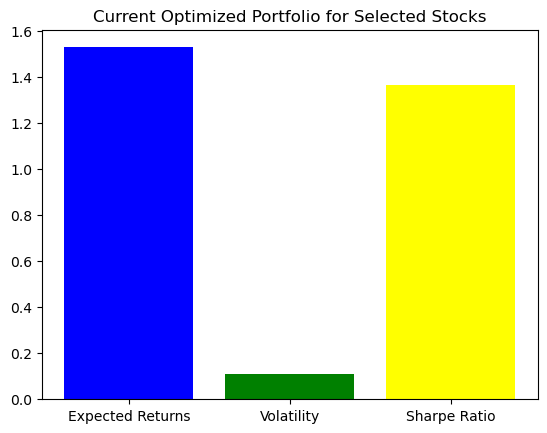

In [6]:
# I imported matplotlib to show the expected returns, volatility, and sharp ratio for both optimized portfolios
# this plot is for the optimized stock portfolio

import matplotlib.pyplot as plt

# visuals of portfolio performance for stocks

labels_stocks = ['Expected Returns','Volatility','Sharpe Ratio']
values_stocks = [portfolio_performace_stocks,portfolio_volatility_stocks,sharpe_ratio_stocks]

plt.bar(labels_stocks,values_stocks,color=['blue','green','yellow'])
plt.title('Current Optimized Portfolio for Selected Stocks')
plt.show()


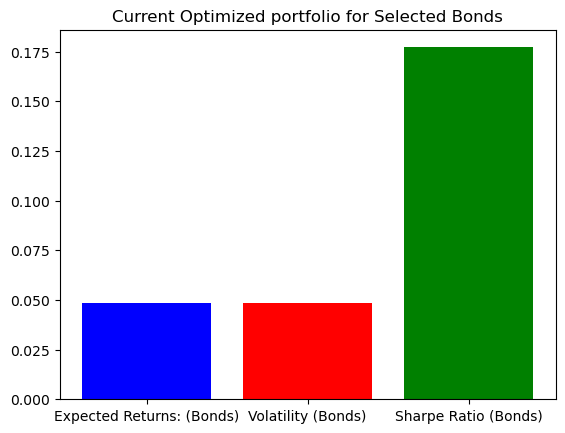

In [7]:
# same, but for the optimized bond portfolio
labels_bonds = ['Expected Returns: (Bonds)','Volatility (Bonds)', 'Sharpe Ratio (Bonds)']
values_bonds = [portfolio_volatility_bonds,portfolio_volatility_bonds,sharpe_ratio_bonds]
plt.bar(labels_bonds,values_bonds,color=['blue','red','green'])
plt.title('Current Optimized portfolio for Selected Bonds')
plt.show()


In [8]:
#this is something I did for fun, it is a corelation maxtirx of returns for both assets
#for fun, I will use polynomial features from sklean to make a correaltion matrix
#this one is just for stocks

from sklearn.preprocessing import PolynomialFeatures
degree = 3

poly = PolynomialFeatures(degree=degree, include_bias=False)
stock_returns_poly = poly.fit_transform(returns_stocks)

correlation_matrix_stocks = pd.DataFrame(stock_returns_poly).corr()

print('Correlation Matrix for current stocks: ')
print(correlation_matrix_stocks)

Correlation Matrix for current stocks: 
          0         1         2         3         4         5         6    \
0    1.000000  0.364821  0.328495  0.271433  0.373993  0.412935  0.108816   
1    0.364821  1.000000  0.032247  0.152138  0.163421  0.212458  0.105297   
2    0.328495  0.032247  1.000000  0.357652  0.390624  0.196869  0.399304   
3    0.271433  0.152138  0.357652  1.000000  0.448834  0.096806 -0.030322   
4    0.373993  0.163421  0.390624  0.448834  1.000000  0.021134  0.199589   
..        ...       ...       ...       ...       ...       ...       ...   
159  0.434938  0.080491  0.240368  0.117731  0.661135  0.473829  0.228937   
160  0.010532  0.059435  0.263893 -0.148737  0.024810  0.107317  0.913967   
161  0.043180  0.082111  0.300495 -0.136979  0.065118  0.122006  0.936114   
162  0.312117  0.170821  0.511604  0.049481  0.457173  0.220281  0.680685   
163  0.323814  0.121991  0.317823  0.129201  0.596139  0.155103  0.233181   

          7         8         9    

In [9]:
# same thing, but now for bonds
poly = PolynomialFeatures(degree=degree, include_bias=False)
bond_returns_poly = poly.fit_transform(returns_bonds)

correlation_matrix_bonds = pd.DataFrame(bond_returns_poly).corr()

print('Correlation Matrix for selected bonds: ')
print(correlation_matrix_bonds)


Correlation Matrix for selected bonds: 
          0         1         2         3         4         5         6    \
0    1.000000  0.989600  0.987679  0.995797  0.261078  0.973520  0.881196   
1    0.989600  1.000000  0.982416  0.985553  0.280448  0.968678  0.867794   
2    0.987679  0.982416  1.000000  0.987570  0.273982  0.956224  0.876465   
3    0.995797  0.985553  0.987570  1.000000  0.267950  0.976035  0.897520   
4    0.261078  0.280448  0.273982  0.267950  1.000000  0.246781  0.331191   
..        ...       ...       ...       ...       ...       ...       ...   
159  0.620813  0.622283  0.629150  0.630220  0.279624  0.595845  0.462210   
160  0.621854  0.607223  0.617045  0.653893  0.238922  0.653332  0.811333   
161  0.656710  0.646347  0.671067  0.667036  0.288840  0.608614  0.626082   
162  0.653716  0.651867  0.666316  0.663726  0.295690  0.610155  0.544666   
163  0.599596  0.596829  0.608736  0.611288  0.277775  0.567084  0.448072   

          7         8         9    

In [10]:
# I will now combine both the bond(risk-free-ish) and stock(risky) portfolios into one portfolio

full_portfolio = pd.concat([df_bonds,df_stocks],axis=1,join='inner')

#returns on stocks and bonds
full_portfolio_returns = full_portfolio.pct_change().dropna()

# expected returns and volatility of full_portfolio

mu_portfolio = expected_returns.mean_historical_return(full_portfolio)
S_portfolio = risk_models.sample_cov(full_portfolio)

In [11]:
# this is going to be the same for the stocks and bonds part, expect the portfolio is combined with bonds and stocks

#Effcient Frontier of full portfolio

ef_portfolio = EfficientFrontier(mu_portfolio, S_portfolio)
full_portfolio_weights = ef_portfolio.max_sharpe(risk_free_rate=risk_free_rate)
cleaned_full_portfolio_weights = ef_portfolio.clean_weights()

print('weights of full portfolio: ', cleaned_full_portfolio_weights)

optimized_full_portfolio_performance = ef_portfolio.portfolio_performance()[0]
optimized_full_portfolio_risk = ef_portfolio.portfolio_performance()[1]

sharpe_ratio_full_portfolio = optimized_full_portfolio_performance - risk_free_rate / optimized_full_portfolio_risk

print('expected returns on optimized full portfolio: ', optimized_full_portfolio_performance)
print('Volatility on optimized full portfolio: ', optimized_full_portfolio_risk)
print('sharpe ratio of full optimized full portfolio ', sharpe_ratio_full_portfolio)


weights of full portfolio:  OrderedDict([('AGG', 0.0), ('BND', 0.0), ('IEF', 0.0), ('IUSB', 0.0), ('JPST', 0.0), ('LQD', 0.0), ('MUB', 0.65643), ('SHY', 0.0), ('AAPL', 0.0), ('GOOGL', 0.00587), ('IBM', 0.08999), ('MCD', 0.18945), ('SBUX', 0.0), ('T', 0.0), ('TGT', 0.05826), ('TSLA', 0.0)])
expected returns on optimized full portfolio:  0.9303980770209915
Volatility on optimized full portfolio:  0.056793615184956785
sharpe ratio of full optimized full portfolio  0.6169825646956769


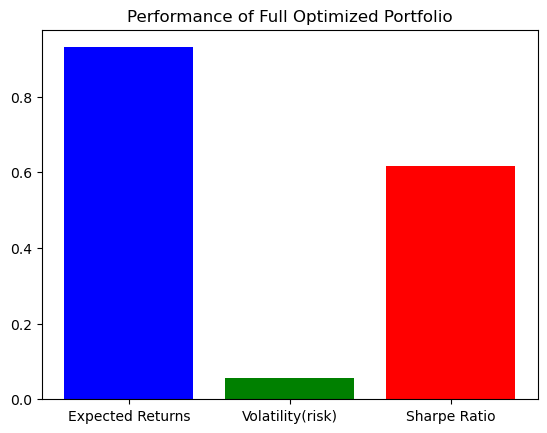

In [12]:
# barplot of optimized full portfolio 
full_portfolio_labels = ['Expected Returns','Volatility(risk)','Sharpe Ratio']
full_portfolio_values = [optimized_full_portfolio_performance,optimized_full_portfolio_risk,sharpe_ratio_full_portfolio]
plt.bar(full_portfolio_labels,full_portfolio_values,color=['blue','green','red'])
plt.title('Performance of Full Optimized Portfolio')
plt.show()

In [13]:
# for fun, polynomial features to make a correlation matrix for full portfolio
# Sadly, no labels

from sklearn.preprocessing import PolynomialFeatures
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
portfolio_returns_poly = poly.fit_transform(full_portfolio)

correlation_matrix_full_portfolio = pd.DataFrame(portfolio_returns_poly).corr()

print('Correlation Matrix for current Full Portfolio: ')
print(correlation_matrix_full_portfolio)

Correlation Matrix for current Full Portfolio: 
          0         1         2         3         4         5         6    \
0    1.000000  0.998697  0.998352  0.999759  0.819141  0.996152  0.969707   
1    0.998697  1.000000  0.998328  0.998492  0.828073  0.995171  0.966748   
2    0.998352  0.998328  1.000000  0.998020  0.820858  0.991514  0.960711   
3    0.999759  0.998492  0.998020  1.000000  0.822148  0.996260  0.971195   
4    0.819141  0.828073  0.820858  0.822148  1.000000  0.833285  0.845917   
..        ...       ...       ...       ...       ...       ...       ...   
147  0.896375  0.890233  0.881913  0.898505  0.775865  0.919934  0.937814   
148  0.930648  0.927653  0.924066  0.931576  0.834422  0.943495  0.957780   
149  0.896681  0.892905  0.883652  0.899074  0.816363  0.919539  0.931151   
150  0.920031  0.918740  0.911639  0.921920  0.865898  0.937595  0.946175   
151  0.902975  0.905358  0.902327  0.903771  0.890871  0.910624  0.914401   

          7         8      